# PTID-CDS-JUL-24-2007

# House Price Prediction- Advanced Regression

Predicting house prices is an important task in the field of real estate and finance. Accurate predictions help stakeholders such as homebuyers, sellers, real estate agents, and investors make informed decisions. However, predicting house prices is complex due to the diverse set of features that influence property values. These features range from physical characteristics of the house, like size and condition, to location-based factors, such as neighborhood and accessibility to amenities.

In this project, we aimed to build machine learning models to predict house prices using advanced regression techniques. We trained and evaluated four different models: Random Forest, XGBoost, Gradient Boosting, and Lasso Regression. Through this, we explored the effectiveness of each model in predicting house prices and optimized their performance through hyperparameter tuning.

# About Dataset

We are using the "Ames Housing dataset" which was compiled by Dean De Cock for use in data science education. It's a great alternative for a modernized and expanded version of the often cited Boston Housing dataset. 

This dataset contains 79 explanatory variables describing various aspects of residential homes in Ames, Iowa.

# Data Loading and Inspection

Before doing anything, let’s load the dataset, inspect its structure, and get a feel for what we are dealing with.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r'C:\Users\DELL\Downloads\PRCP-1020-HousePricePred\Data\data.csv')

Let's check the first few rows

In [5]:
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

Let's check the data types 

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Let's get the statistical summary of the data

In [7]:
print(data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

# Exploratory Data Analysis (EDA) 

# Understanding and handling missing Data

We will check for missing values in each column

In [8]:
missing_data = data.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


<Figure size 1000x600 with 0 Axes>

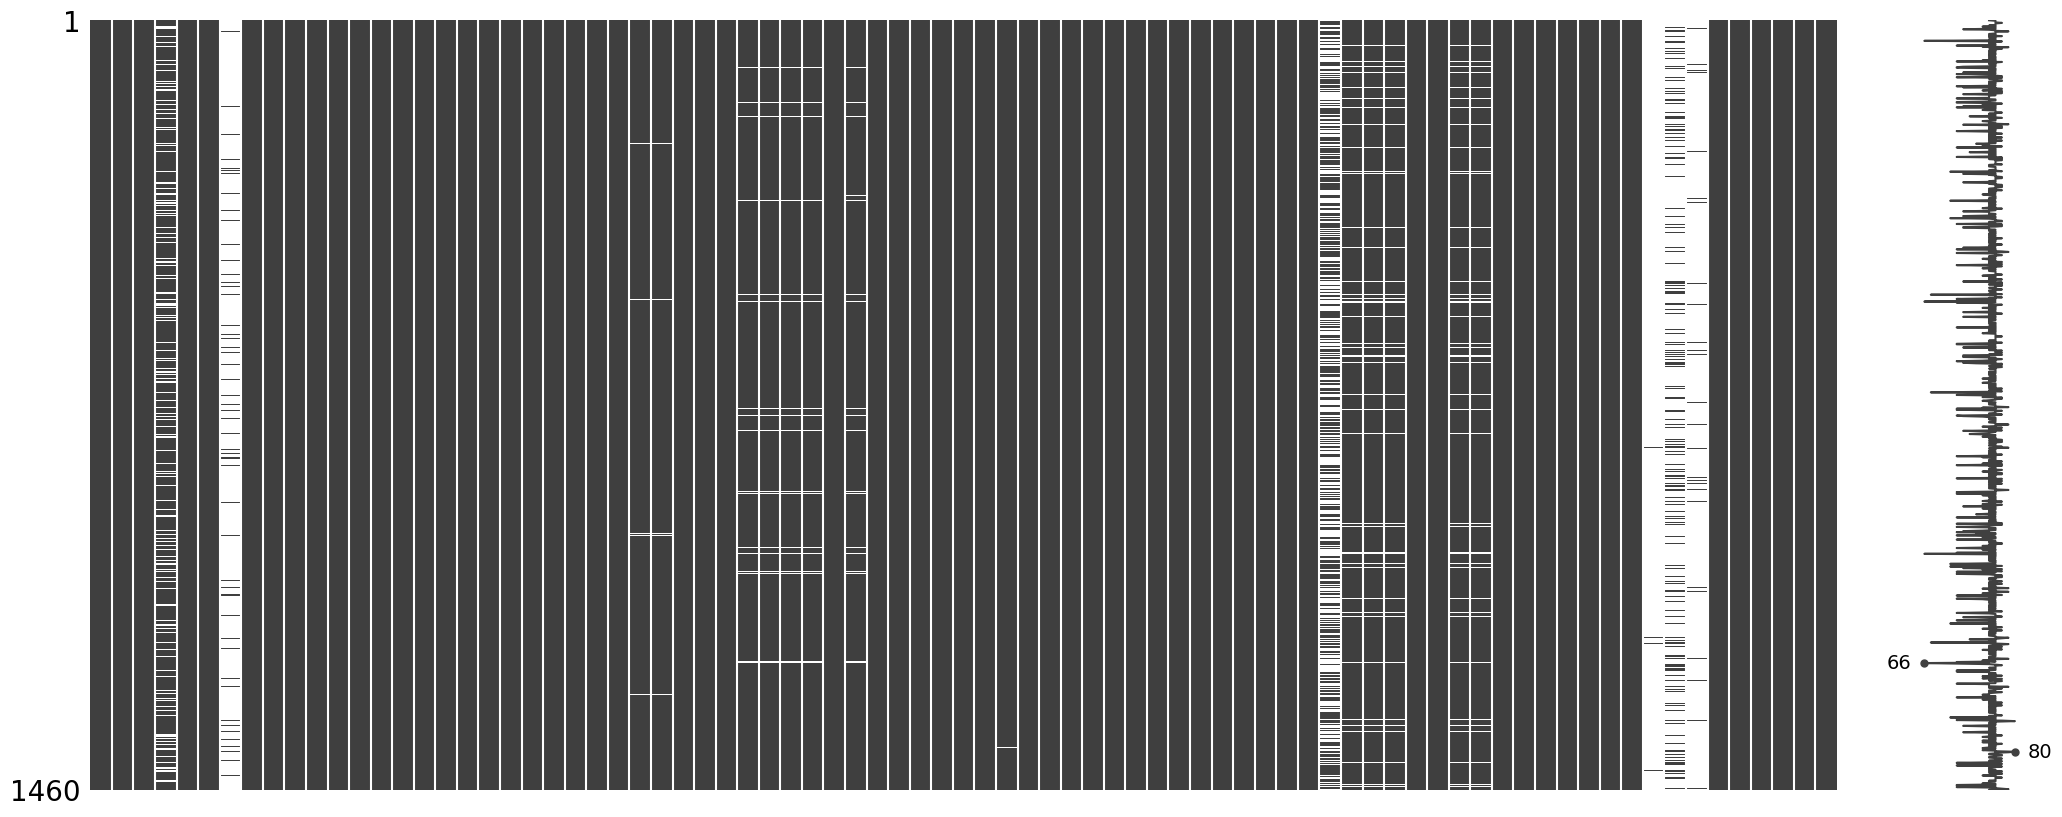

In [9]:
import missingno as msno
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
msno.matrix(data)
plt.show()

In [10]:
missingdata_visualization = data.copy()
missingdata_visualization.replace('--', np.nan, inplace=True)

For columns with most of the data is missing, and it’s unlikely that we can impute these values meaningfully. we will choose to drop these columns.

In [11]:
data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

For columns related to Garage the missing values likely indicate houses without garages. We can fill these as 0 for numeric columns and 'None' for categorical ones.

In [12]:
data['GarageYrBlt'].fillna(0, inplace=True)
data['GarageCond'].fillna('None', inplace=True)
data['GarageType'].fillna('None', inplace=True)
data['GarageFinish'].fillna('None', inplace=True)
data['GarageQual'].fillna('None', inplace=True)

Similar to the garage features, for basement related columns missing values likely indicate no basement, so fill them with 0 or 'None'.

In [13]:
data['BsmtQual'].fillna('None', inplace=True)
data['BsmtCond'].fillna('None', inplace=True)
data['BsmtExposure'].fillna('None', inplace=True)
data['BsmtFinType1'].fillna('None', inplace=True)
data['BsmtFinType2'].fillna('None', inplace=True)

Same way for masory veneer, missing values indicate no masonry veneer. Fill with 'None' and  0.

In [14]:
data['MasVnrType'].fillna('None', inplace=True)
data['MasVnrArea'].fillna(0, inplace=True)

Similarly lets fill fireplace missing values with 'None'

In [15]:
data['FireplaceQu'].fillna('None', inplace=True)

Since LotFrontage is numeric and has a significant number of missing values, we fill it using the median value 

In [16]:
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)

Electrical has only one missing value, so you can fill it with the mode 

In [17]:
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)

Lets verify to ensure all the missing Values handled

In [18]:
print(data.isnull().sum().sort_values(ascending=False).head(10))

Id              0
HalfBath        0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
FullBath        0
dtype: int64


## Data statistics

We start by generating basic summary statistics for numerical features

In [19]:
print(data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.117123   443.639726  ...   
std       1.112799    30.202904     20.645407   180.731373   456.098091  ..

For categorical features, lets see the unique values and their distribution.

In [20]:
for col in data.select_dtypes(include='object').columns:
    print(f'{col} distribution:')
    print(data[col].value_counts())
    print('\n')

MSZoning distribution:
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Street distribution:
Pave    1454
Grvl       6
Name: Street, dtype: int64


LotShape distribution:
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


LandContour distribution:
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


Utilities distribution:
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


LotConfig distribution:
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


LandSlope distribution:
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


Neighborhood distribution:
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
Cle

## Correlation Matrix

Lets check how different numerical features are correlated with each other and with the target variable (SalePrice).

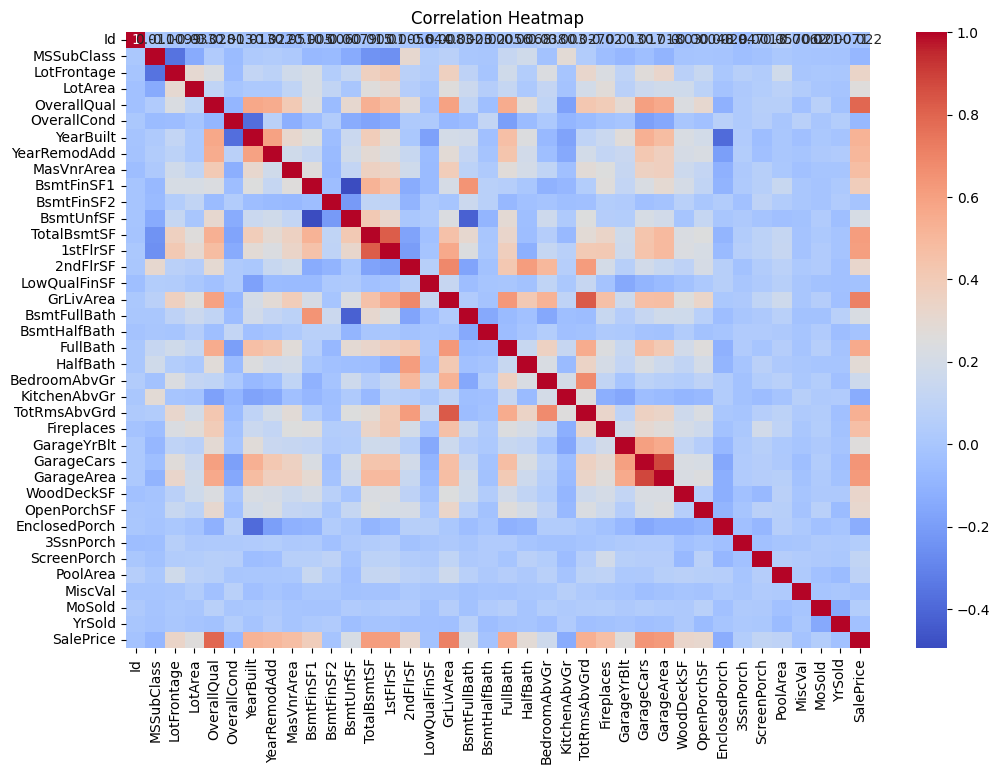

In [21]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Observation**
*  GrLivArea and SalePrice have a strong positive correlation, which suggests that larger houses tend to have higher sale prices.

* OverallQual, GarageCars, GarageArea, and TotalBsmtSF also have moderate positive correlations with SalePrice, indicating that these features contribute to higher house prices.

* EnclosedPorch and MiscVal have negative correlations with SalePrice, suggesting that these features might have a negative impact on house prices.

## Visualizing Key Relationships

**Distribution of Target Variable (SalePrice)**

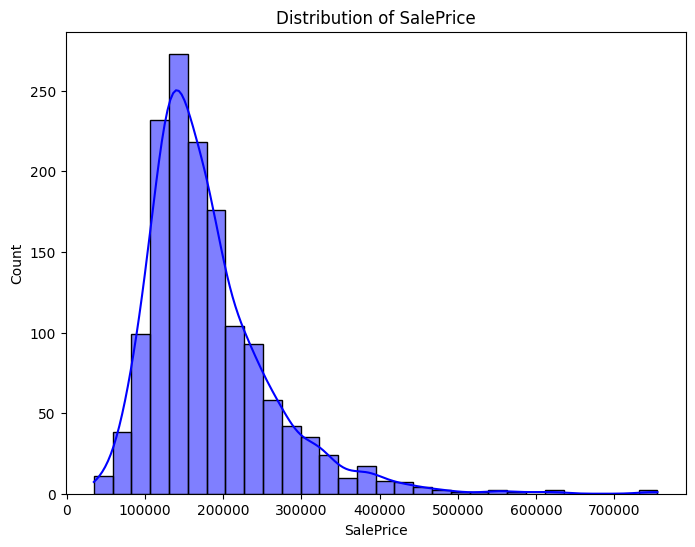

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data['SalePrice'], kde=True, color='blue', bins=30)
plt.title('Distribution of SalePrice')
plt.show()

* The distribution is skewed to the right, indicating there are a few houses with significantly higher sale prices compared to the majority.
* The peak falls within range $ 150,000-$ 200,000, suggesting this is the most common price range 
* There are a few outliers on the right side of the distribution, representing houses with exceptionally high sale prices. 


**Relationship Between Features and Target**

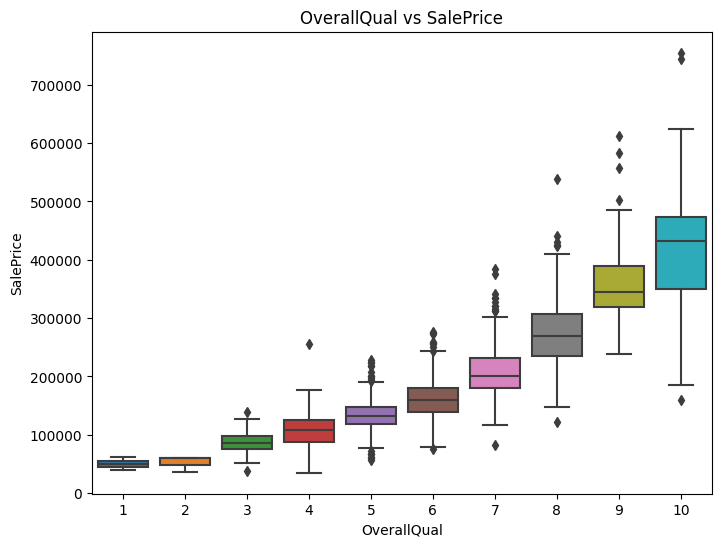

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=data)
plt.title('OverallQual vs SalePrice')
plt.show()


* As the OverallQual increases (from 1 to 10), the median sale price generally increases. 
* Within each OverallQual category, there is a range of sale prices. 
* There are outlier houses with sale prices that are significantly different from the majority within their respective OverallQual categories.

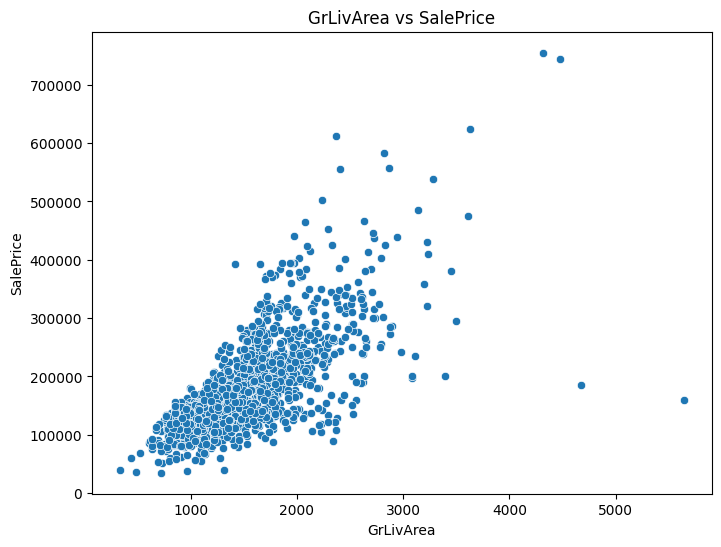

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.title('GrLivArea vs SalePrice')
plt.show()

* There is a clear positive correlation between living area and sale price.
* There are a few outliers. These are houses with exceptionally large living areas compared to their sale prices, or vice versa.

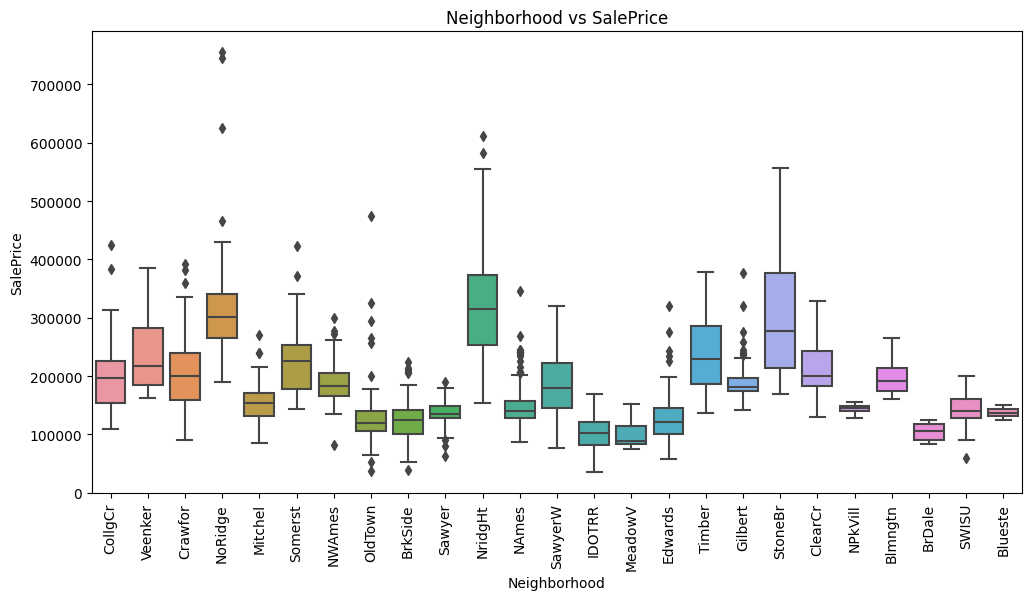

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=data)
plt.xticks(rotation=90)
plt.title('Neighborhood vs SalePrice')
plt.show()

* Some neighborhoods have a higher overall median sale price and a smaller range of prices, while others have a lower median and a wider range.
* There are outliers present in several neighborhoods.
* Some neighborhoods with higher median sale prices include NoRidge, Crawfor, and Somerst, while neighborhoods like BrDale, SWISU, and Blueste generally have lower sale prices.

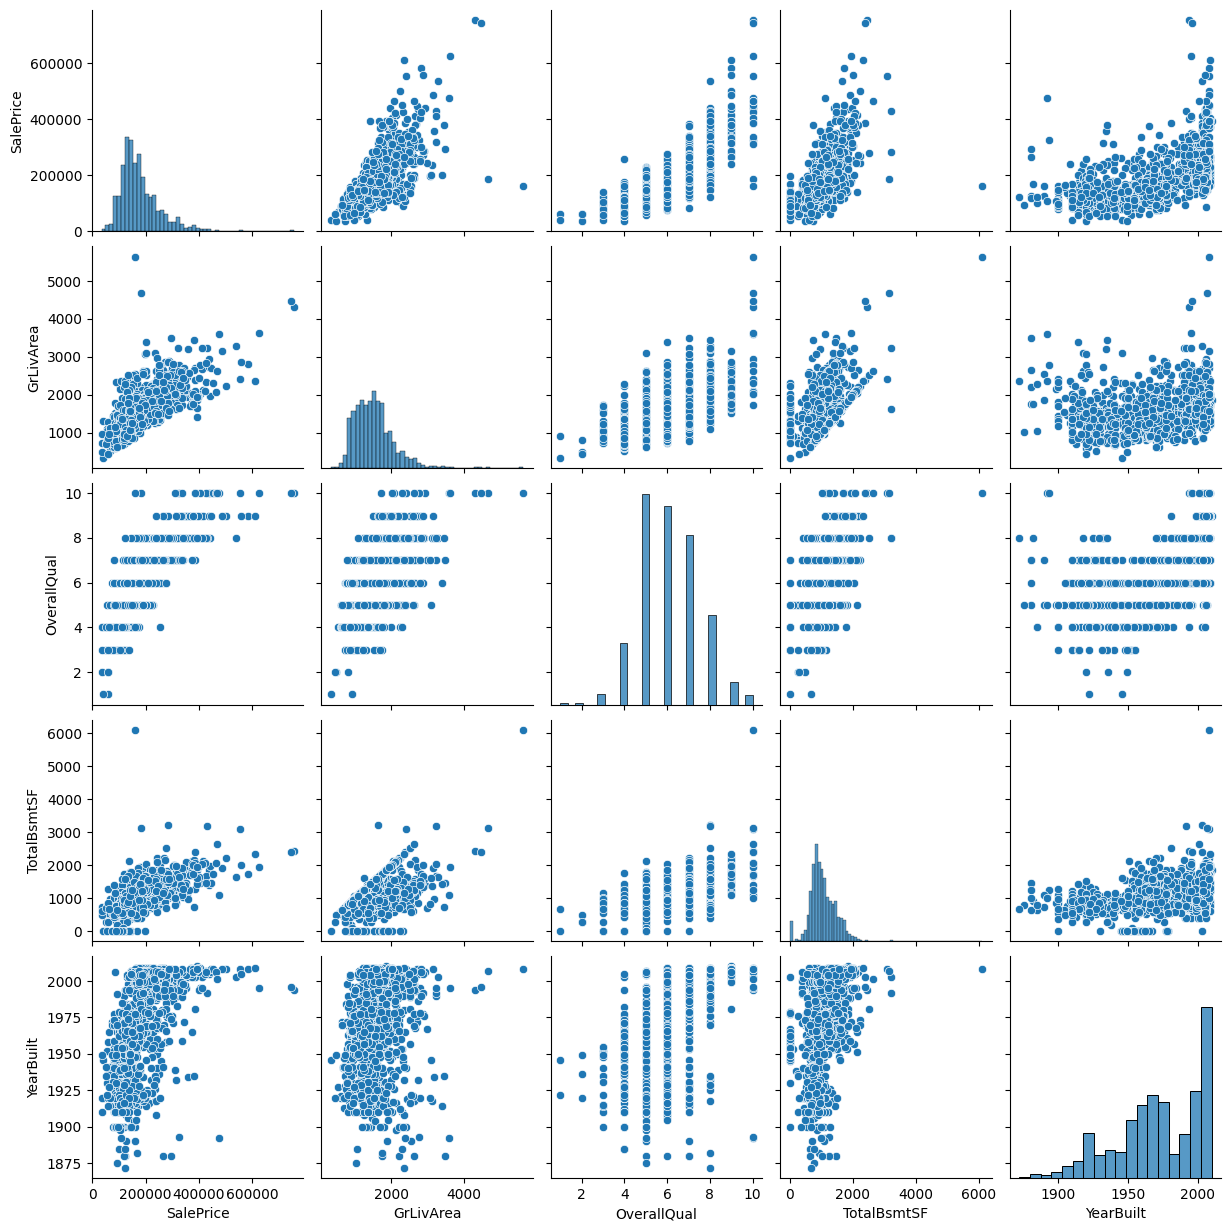

In [26]:
sns.pairplot(data[['SalePrice', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']])
plt.show()

* GrLivArea, OverallQual, and TotalBsmtSF show a clear positive correlation to the sale price.
* YearBuilt and SalePrice might show a negative correlation, indicating that older houses might have lower sale prices 
* There are a few outliers with exceptionally high values.

## Outlier Detection

Lets see outliers that could potentially skew our model results.

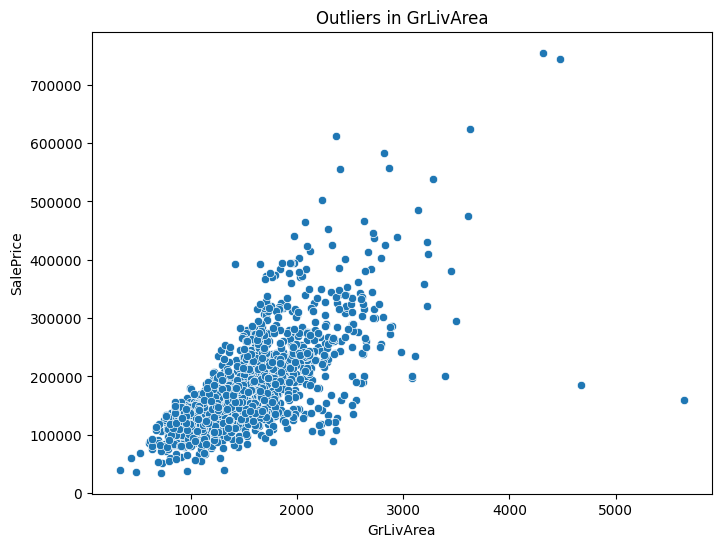

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.title('Outliers in GrLivArea')
plt.show()

In [28]:
Q1 = data['GrLivArea'].quantile(0.25)
Q3 = data['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['GrLivArea'] < lower_bound) | (data['GrLivArea'] > upper_bound)]
print("Number of outliers in GrLivArea:", len(outliers))

outliers[['GrLivArea', 'SalePrice']]

Number of outliers in GrLivArea: 31


,GrLivArea,SalePrice
58,2945,438780
118,3222,320000
185,3608,475000
197,3112,235000
231,2794,403000
304,3493,295000
324,2978,242000
496,3228,430000
523,4676,184750
583,2775,325000


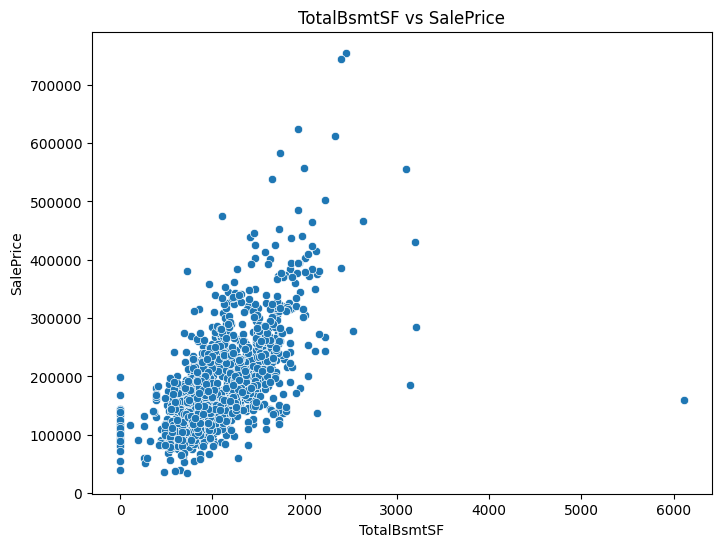

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=data)
plt.title('TotalBsmtSF vs SalePrice')
plt.show()

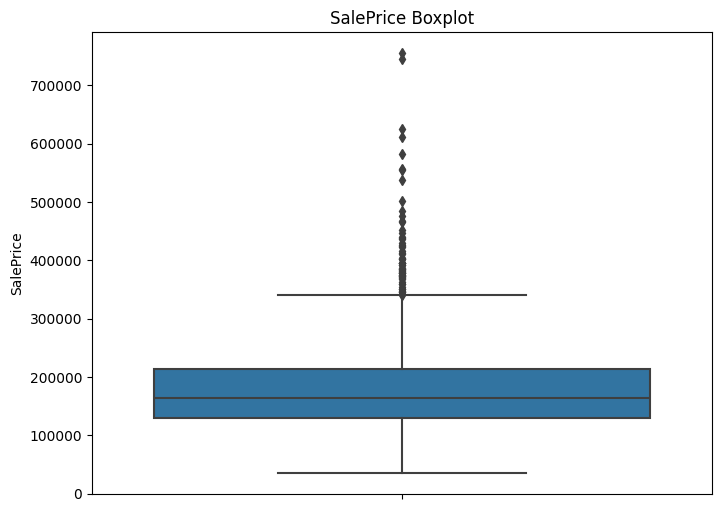

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='SalePrice', data=data)
plt.title('SalePrice Boxplot')
plt.show()

In [31]:
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['SalePrice'] < lower_bound) | (data['SalePrice'] > upper_bound)]
print("Number of outliers in SalePrice:", len(outliers))

outliers[['GrLivArea', 'SalePrice']]

Number of outliers in SalePrice: 61


,GrLivArea,SalePrice
11,2324,345000
53,1842,385000
58,2945,438780
112,2696,383970
151,1710,372402
...,...,...
1268,3447,381000
1353,3238,410000
1373,2633,466500
1388,1746,377500


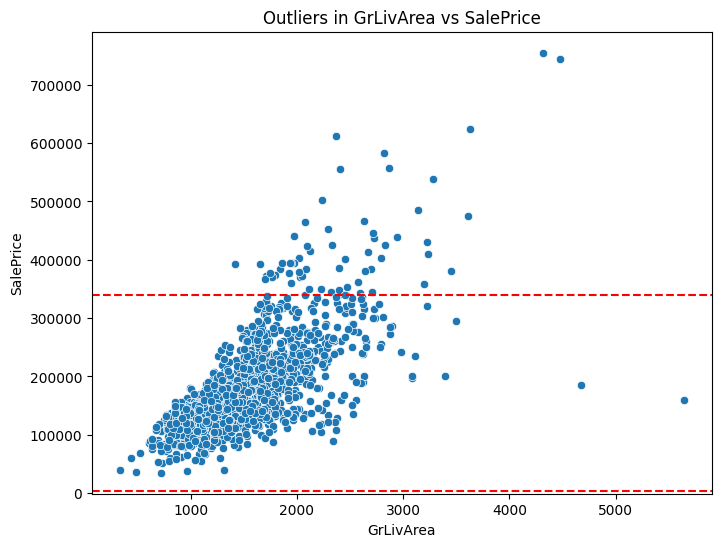

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.axhline(upper_bound, color='r', linestyle='--')  # Upper bound
plt.axhline(lower_bound, color='r', linestyle='--')  # Lower bound
plt.title('Outliers in GrLivArea vs SalePrice')
plt.show()

# Feature importane analysis

We’ll use the training data to fit a Random Forest model and then extract the important features

In [37]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
importances = rf.feature_importances_
features = X_train.columns

feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(20)

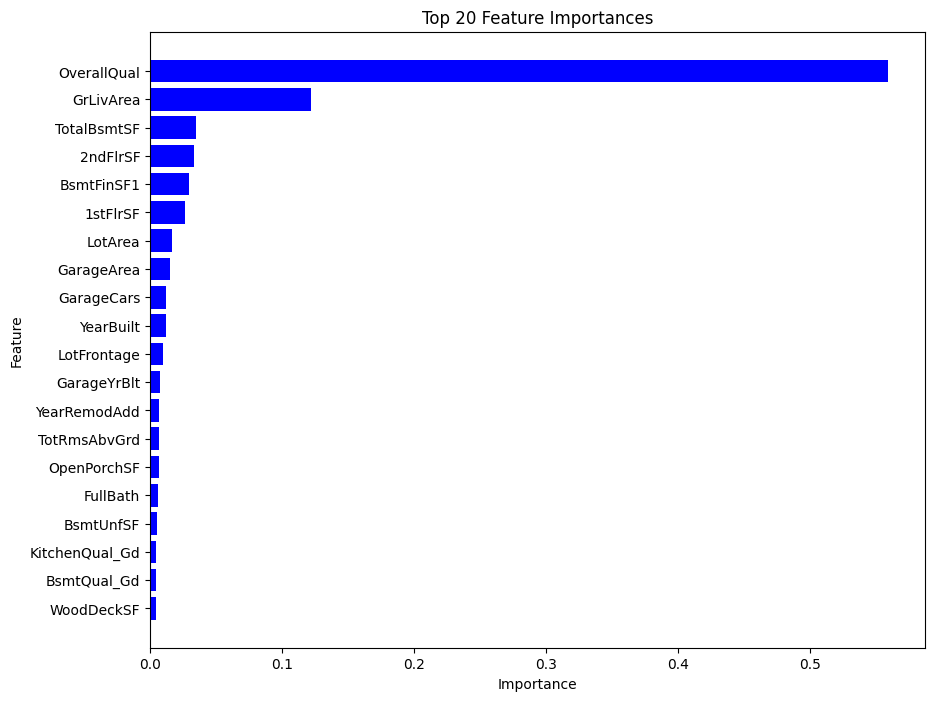

In [40]:
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

# Feature Engineering

## One-Hot Encoding

We'll first perform one-hot encoding for the categorical variables. This ensures categorical variables can be used in machine learning models that require numerical inputs.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [70]:
data_encoded = pd.get_dummies(data, drop_first=True) 

print(f"Shape of data before encoding: {data.shape}")
print(f"Shape of data after encoding: {data_encoded.shape}")

Shape of data before encoding: (1460, 82)
Shape of data after encoding: (1460, 252)


## Log transformation for Target variable

This is to normalize the SalePrice distribution, reducing skewness

In [41]:
data['SalePrice'] = np.log1p(data['SalePrice']) 

## Combining related features

Total Livable Area: Combine TotalBsmtSF and GrLivArea to form a new feature, TotalLivableArea.

In [42]:
data['TotalLivableArea'] = data['TotalBsmtSF'] + data['GrLivArea']

Total Porch Area: Sum up all the porch areas (OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch) into one feature.

In [43]:
data['TotalPorchSF'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch']

Bathrooms: Combine FullBath, HalfBath, BsmtFullBath, and BsmtHalfBath into a new feature to reflect the total number of bathrooms.

In [44]:
data['TotalBathrooms'] = data['FullBath'] + (0.5 * data['HalfBath']) + data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath'])

##  Time based features

House Age: Calculate how old the house is at the time of sale (YrSold - YearBuilt).

In [45]:
data['HouseAge'] = data['YrSold'] - data['YearBuilt']

Years Since Remodel: Calculate the time since the house was last remodeled (YrSold - YearRemodAdd).

In [46]:
data['YearsSinceRemodel'] = data['YrSold'] - data['YearRemodAdd']

## Grouping categorical features

For the Neighborhood variable, we can combine neighborhoods with fewer observations into a single category.

In [47]:
neighborhood_counts = data['Neighborhood'].value_counts()
rare_neighborhoods = neighborhood_counts[neighborhood_counts < 10].index
data['Neighborhood'] = data['Neighborhood'].replace(rare_neighborhoods, 'Other')

# Data preprocessing

## Scaling

In [101]:
from sklearn.preprocessing import StandardScaler

X = data_encoded.drop('SalePrice', axis=1)
y = data_encoded['SalePrice']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

## Train-Test Split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (1168, 251)
Testing set shape: (292, 251)


# Baseline model building and Evaluation

# Random Forest Regression

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [49]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [50]:
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [54]:
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f"Random Forest - Training RMSE: {rmse_train_rf:.4f}, Testing RMSE: {rmse_test_rf:.4f}")
print(f"Random Forest - Training R2 Score: {r2_train_rf:.4f}, Testing R2 Score: {r2_test_rf:.4f}")

Random Forest - Training RMSE: 11088.6374, Testing RMSE: 29332.1244
Random Forest - Training R2 Score: 0.9794, Testing R2 Score: 0.8878


# GradientBoosting Regression

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [62]:
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

In [63]:
mse_train_gb = mean_squared_error(y_train, y_train_pred_gb)
mse_test_gb = mean_squared_error(y_test, y_test_pred_gb)
rmse_train_gb = np.sqrt(mse_train_gb)
rmse_test_gb = np.sqrt(mse_test_gb)
r2_train_gb = r2_score(y_train, y_train_pred_gb)
r2_test_gb = r2_score(y_test, y_test_pred_gb)

print(f"Gradient Boosting - Training RMSE: {rmse_train_gb:.4f}, Testing RMSE: {rmse_test_gb:.4f}")
print(f"Gradient Boosting - Training R2 Score: {r2_train_gb:.4f}, Testing R2 Score: {r2_test_gb:.4f}")

Gradient Boosting - Training RMSE: 13786.7822, Testing RMSE: 29878.6295
Gradient Boosting - Training R2 Score: 0.9681, Testing R2 Score: 0.8836


# XGBoost Regression

In [55]:
from xgboost import XGBRegressor

In [56]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [57]:
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

In [59]:
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
rmse_train_xgb = np.sqrt(mse_train_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

print(f"XGBoost - Training RMSE: {rmse_train_xgb:.4f}, Testing RMSE: {rmse_test_xgb:.4f}")
print(f"XGBoost - Training R2 Score: {r2_train_xgb:.4f}, Testing R2 Score: {r2_test_xgb:.4f}")

XGBoost - Training RMSE: 1315.9352, Testing RMSE: 27899.6195
XGBoost - Training R2 Score: 0.9997, Testing R2 Score: 0.8985


# Hyperparameter Tuning

## For Random Forest

We'll use Grid Search to find the best hyperparameters for Random Forest model. 

**Tuning Parameters**:

**n_estimators**: Number of trees in the forest.

**max_depth**: Maximum depth of the trees.

**min_samples_split**: Minimum number of samples required to split an internal node.

**min_samples_leaf**: Minimum number of samples required to be at a leaf node.

**max_features**: Number of features to consider when looking for the best split.

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [81]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [82]:
rf_model = RandomForestRegressor(random_state=42)

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, 
                              scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [83]:
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")
print(f"Best score (neg_mean_squared_error): {rf_grid_search.best_score_}")

Best parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score (neg_mean_squared_error): -0.0208394510678256


In [85]:
best_rf_model = rf_grid_search.best_estimator_

In [86]:
y_train_pred_rf_best = best_rf_model.predict(X_train)
y_test_pred_rf_best = best_rf_model.predict(X_test)

In [87]:
mse_train_rf_best = mean_squared_error(y_train, y_train_pred_rf_best)
mse_test_rf_best = mean_squared_error(y_test, y_test_pred_rf_best)
rmse_train_rf_best = np.sqrt(mse_train_rf_best)
rmse_test_rf_best = np.sqrt(mse_test_rf_best)
r2_train_rf_best = r2_score(y_train, y_train_pred_rf_best)
r2_test_rf_best = r2_score(y_test, y_test_pred_rf_best)

print(f"Best Random Forest - Training RMSE: {rmse_train_rf_best:.4f}, Testing RMSE: {rmse_test_rf_best:.4f}")
print(f"Best Random Forest - Training R2 Score: {r2_train_rf_best:.4f}, Testing R2 Score: {r2_test_rf_best:.4f}")

Best Random Forest - Training RMSE: 0.0527, Testing RMSE: 0.1590
Best Random Forest - Training R2 Score: 0.9818, Testing R2 Score: 0.8645


# Lasso Regression

In [149]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [150]:
numerical_features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'LotFrontage', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1']
categorical_features = [col for col in X_train.columns if col.startswith('Neighborhood_') or 
                        col.startswith('ExterQual_') or 
                        col.startswith('BsmtQual_') or 
                        col.startswith('KitchenQual_') or 
                        col.startswith('HeatingQC_')]

In [151]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numerical_transformer = StandardScaler()
categorical_transformer = 'passthrough'  # since already one-hot encoded

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [152]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

lasso_model = Lasso(alpha=0.1)
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', lasso_model)
])

lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['OverallQual', 'GrLivArea',
                                                   'TotalBsmtSF', 'GarageCars',
                                                   'GarageArea', 'LotFrontage',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea',
                                                   'BsmtFinSF1']),
                                                 ('cat', 'passthrough',
                                                  ['Neighborhood_BrDale',
                                                   'Neighborhood_BrkSide',
                                                   'Neighborhood_ClearCr',
                                                   'Neighborhood_CollgCr',
                                                   'Neighborhood...
                                                   'Neighborhood_NridgHt',
                                                   'Neighborhood_OldTown',
                                                   'Neighborhood_Other',
                                                   'Neighborhood_SWISU',
                                                   'Neighborhood_Sawyer',
                                                   'Neighborhood_SawyerW',
                                                   'Neighborhood_Somerst',
                                                   'Neighborhood_StoneBr',
                                                   'Neighborhood_Timber',
                                                   'Neighborhood_Veenker',
                                                   'ExterQual_Fa',
                                                   'ExterQual_Gd',
                                                   'ExterQual_TA',
                                                   'BsmtQual_Fa', 'BsmtQual_Gd',
                                                   'BsmtQual_None',
                                                   'BsmtQual_TA', ...])])),
                ('model', Lasso(alpha=0.1))])

In [153]:
from sklearn.metrics import root_mean_squared_error
y_test_pred_lasso = lasso_pipeline.predict(X_test)

rmse_test_lasso = root_mean_squared_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"Lasso Regression - Testing RMSE: {rmse_test_lasso:.4f}")
print(f"Lasso Regression - Testing R2 Score: {r2_test_lasso:.4f}")

Lasso Regression - Testing RMSE: 0.2407
Lasso Regression - Testing R2 Score: 0.6895


## For GradientBoost model

We'll use Randomized Search to find the best combination of hyperparameters.

**n_estimators**: Number of boosting stages.
    
**max_depth**: Maximum depth of the individual estimators.
    
**learning_rate**: Shrinks the contribution of each tree.
    
**subsample**: Fraction of samples used for fitting each individual base learner.
    
**min_samples_split**: Minimum number of samples required to split an internal node.
    
**min_samples_leaf**: Minimum number of samples required to be at a leaf node.

In [88]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [89]:
param_grid_gb = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [90]:
gb_model = GradientBoostingRegressor(random_state=42)

gb_random_search = RandomizedSearchCV(estimator=gb_model, 
                                      param_distributions=param_grid_gb, 
                                      n_iter=50, 
                                      cv=3, 
                                      verbose=2, 
                                      random_state=42, 
                                      n_jobs=-1)

gb_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, verbose=2)

In [91]:
best_gb_model = gb_random_search.best_estimator_
y_train_pred_gb_tuned = best_gb_model.predict(X_train)
y_test_pred_gb_tuned = best_gb_model.predict(X_test)

In [92]:
mse_train_gb_tuned = mean_squared_error(y_train, y_train_pred_gb_tuned)
mse_test_gb_tuned = mean_squared_error(y_test, y_test_pred_gb_tuned)
rmse_train_gb_tuned = np.sqrt(mse_train_gb_tuned)
rmse_test_gb_tuned = np.sqrt(mse_test_gb_tuned)
r2_train_gb_tuned = r2_score(y_train, y_train_pred_gb_tuned)
r2_test_gb_tuned = r2_score(y_test, y_test_pred_gb_tuned)

print(f"Best Gradient Boosting - Training RMSE: {rmse_train_gb_tuned:.4f}, Testing RMSE: {rmse_test_gb_tuned:.4f}")
print(f"Best Gradient Boosting - Training R2 Score: {r2_train_gb_tuned:.4f}, Testing R2 Score: {r2_test_gb_tuned:.4f}")

Best Gradient Boosting - Training RMSE: 0.0603, Testing RMSE: 0.1365
Best Gradient Boosting - Training R2 Score: 0.9761, Testing R2 Score: 0.9002


## For XGBoost model

**Tuning parameters**:

**n_estimators**: Number of boosting rounds or trees in the model. 

**max_depth**: Maximum depth of each tree. 

**learning_rate**: Step size shrinkage used to prevent overfitting. 

**subsample**: Fraction of the training data used to fit each individual tree. 

**colsample_bytree**: Fraction of features to be randomly sampled for each tree. 

**gamma**: Minimum loss reduction required to make a split.

**min_child_weight**: Minimum sum of instance weight (hessian) needed in a child node. 

In [93]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5]
}

In [96]:
xgb_model = XGBRegressor(random_state=42)

xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=100,  
    scoring='neg_mean_squared_error',
    cv=5,  
    verbose=2,
    random_state=42,
    n_jobs=-1  
)

xgb_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [97]:
best_xgb_params = xgb_random_search.best_params_
best_xgb_model = xgb_random_search.best_estimator_

print(f"Best Parameters for XGBoost: {best_xgb_params}")

Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}


In [98]:
y_train_pred_xgb = best_xgb_model.predict(X_train)
y_test_pred_xgb = best_xgb_model.predict(X_test)

rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

print(f"Best XGBoost - Training RMSE: {rmse_train_xgb:.4f}, Testing RMSE: {rmse_test_xgb:.4f}")
print(f"Best XGBoost - Training R2 Score: {r2_train_xgb:.4f}, Testing R2 Score: {r2_test_xgb:.4f}")

Best XGBoost - Training RMSE: 0.0665, Testing RMSE: 0.1372
Best XGBoost - Training R2 Score: 0.9710, Testing R2 Score: 0.8991


## For Lasso model

In [162]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

In [155]:
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', Lasso())
])

param_grid = {
    'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]  
}

lasso_grid_search = GridSearchCV(
    estimator=lasso_pipeline,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

lasso_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                          100]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [163]:
r2_best_lasso = r2_score(y_test, y_pred_best_lasso)
rmse_best_lasso = root_mean_squared_error(y_test, y_pred_best_lasso)

print(f"Best Lasso Parameters: {best_lasso_params}")
print(f"Best Lasso - Testing R² Score: {r2_best_lasso:.4f}")
print(f"Best Lasso - Testing RMSE: {rmse_best_lasso:.4f}")

Best Lasso Parameters: {'model__alpha': 0.01}
Best Lasso - Testing R² Score: 0.8869
Best Lasso - Testing RMSE: 0.1453


# Comparison Report

In [164]:
import pandas as pd

data = {
    'Model': ['Random Forest', 'Random Forest (Tuned)', 'Gradient Boosting', 'Gradient Boosting (Tuned)',
              'XGBoost', 'XGBoost (Tuned)', 'Lasso Regression', 'Lasso Regression (Tuned)'],
    'Training R²': [0.9794, 0.9818, 0.9681, 0.9761, 0.9997, 0.9710, 0.9349, 0.8875],
    'Testing R²': [0.8878, 0.8645, 0.8836, 0.9002, 0.8985, 0.8991, 0.6435, 0.8869],
    'Training RMSE': [11088.6374, 0.0527, 13786.7822, 0.0603, 1315.9352, 0.0665, 19703.9235, 0.0593],
    'Testing RMSE': [29332.1244, 0.1590, 29878.6295, 0.1365, 27899.6195, 0.1372, 52290.1690, 0.1453]
}

df = pd.DataFrame(data)

In [165]:
df.style.set_caption("Model Performance Comparison")

,Model,Training R²,Testing R²,Training RMSE,Testing RMSE
0,Random Forest,0.979400,0.887800,11088.637400,29332.124400
1,Random Forest (Tuned),0.981800,0.864500,0.052700,0.159000
2,Gradient Boosting,0.968100,0.883600,13786.782200,29878.629500
3,Gradient Boosting (Tuned),0.976100,0.900200,0.060300,0.136500
4,XGBoost,0.999700,0.898500,1315.935200,27899.619500
5,XGBoost (Tuned),0.971000,0.899100,0.066500,0.137200
6,Lasso Regression,0.934900,0.643500,19703.923500,52290.169000
7,Lasso Regression (Tuned),0.887500,0.886900,0.059300,0.145300


# Conclusions

**Random Forest**:

* The tuned model showed a slight improvement in training R² but a marginal decline in testing R² compared to the baseline.
However, the tuned model achieved much lower RMSE values, indicating better performance.

**Gradient Boosting:**

* The tuned Gradient Boosting model significantly improved both the R² score and RMSE on the test set compared to the baseline, making it more reliable and accurate for prediction.

**XGBoost**:

* Although the training R² decreased in the tuned version, the testing R² slightly improved, indicating better generalization and the model became less prone to overfitting.

**Lasso Regression**:

* The baseline Lasso model had the lowest performance among all models. The tuned Lasso model showed a significant improvement making Lasso model reliable. 

**The Gradient Boosting model emerged as the best-performing model after tuning, with the highest Testing R² (0.9002) and one of the lowest Testing RMSE values (0.1365).**

# Challenges faced

**Feature Engineering**

Identifying meaningful feature transformations and combinations was time consuming. 

Solution: Some new features were created based on domain knowledge. These combined relevant information and reduced the complexity of the model.

**Handling Categorical Features**

The dataset contained numerous categorical features, some with many unique values. Properly encoding these features without causing overfitting was required.

Solution: One-hot encoding was applied to categorical features to convert them into a suitable numerical format. 

**Hyperparameter Tuning for Complex Models**

Finding the best combination of hyperparameters for models like Random Forest, Gradient Boosting, and XGBoost was computationally time consuming.

Solution: A combination of Randomized Search and Grid Search was used to efficiently search the hyperparameter space. This approach reduced computation time while still identifying good hyperparameter combinations.

**Warnings and Errors During Model Training**

Several warnings and errors were encountered during model training, such as convergence warnings in Lasso and parameter validation errors.

Solution: Each warning and error was addressed by modifying the model parameters and validating the input data types and shapes. 

**Understanding Model Coefficients and Importance**

Interpreting the coefficients of regularized models like Lasso to understand feature importance was challenging due to the large number of features.

Solution: Feature coefficients were analyzed, and a report of features with zero coefficients was generated to identify those excluded by the model. 